## Machine Learning for Regression
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# display plots generated by Matplotlib directly inside the notebook. Instead of opening the plots in a separate window
%matplotlib inline 

***Data Preparation***
---
---

In [1]:
df = pd.read_csv('data/data.csv')
df.head()

NameError: name 'pd' is not defined

In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
strings = df.dtypes[df.dtypes == 'object'].index.tolist()
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [5]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')
    
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


***Exploratory Data Analysis***
---
---

In [6]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

<Axes: xlabel='msrp', ylabel='Count'>

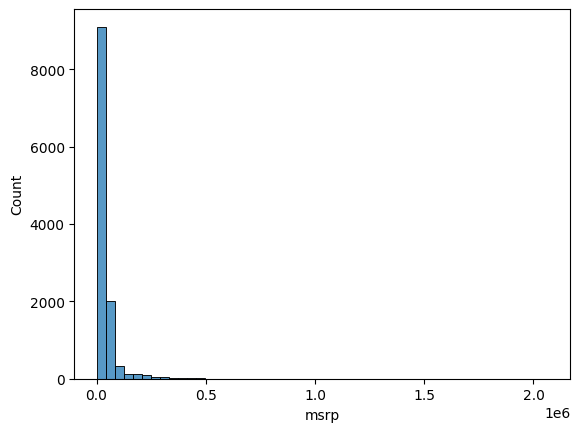

In [7]:
sns.histplot(df.msrp, bins = 50) # Long tail distribution

<Axes: xlabel='msrp', ylabel='Count'>

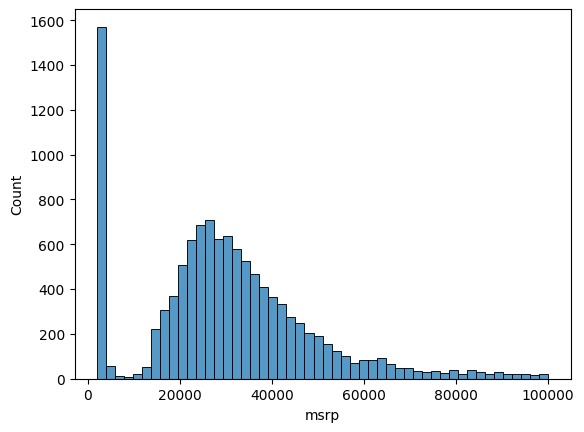

In [8]:
sns.histplot(df.msrp[df.msrp < 100000], bins = 50)

<Axes: xlabel='msrp', ylabel='Count'>

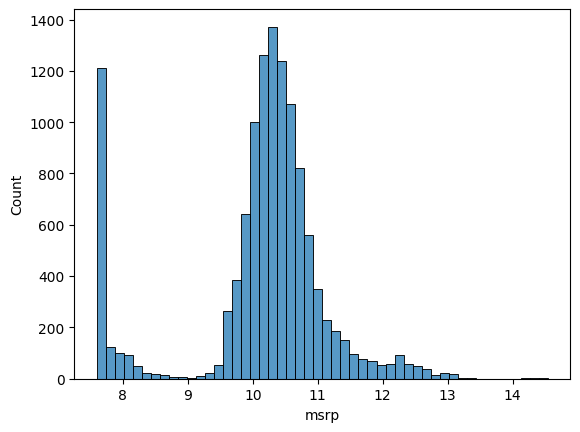

In [9]:
price_logs = np.log1p(df.msrp)

sns.histplot(price_logs, bins = 50) # Normal distribution

In [10]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

***Validation Framework***
---
---

In [11]:
np.random.seed(2)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [12]:
y_train_orig = df_train.msrp.values
y_val_orig = df_val.msrp.values
y_test_orig = df_test.msrp.values

y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

***Linear Regression***
---
---

In [13]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

***Training Linear Regression model***
---
---

In [14]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [15]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [16]:
X_train = df_train[base].fillna(0).values

In [17]:
w0, w = train_linear_regression(X_train, y_train)

In [18]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

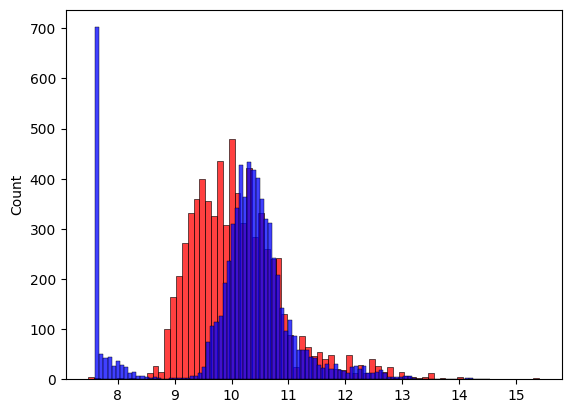

In [19]:
sns.histplot(y_pred, color='red', label='predicted')
sns.histplot(y_train, color='blue', label='actual')

***RMSE (Root Mean Squared Error)***
---
---

In [20]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    
    return np.sqrt(mse)

In [21]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

***Validating the Model***
---
---

In [22]:
def prepare_x(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [23]:
X_train = prepare_x(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)


np.float64(0.761653099130156)

***Simple Feature Engineering***
---
---

In [24]:
def prepare_x(df):
    df = df.copy()
    df['age'] = 2017 - df.year
    features = base + ['age']
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [25]:
X_train = prepare_x(df_train)

In [26]:
X_train

array([[1.480e+02, 4.000e+00, 3.300e+01, 2.400e+01, 1.385e+03, 9.000e+00],
       [1.320e+02, 4.000e+00, 3.200e+01, 2.500e+01, 2.031e+03, 5.000e+00],
       [1.480e+02, 4.000e+00, 3.700e+01, 2.800e+01, 6.400e+02, 1.000e+00],
       ...,
       [2.850e+02, 6.000e+00, 2.200e+01, 1.700e+01, 5.490e+02, 2.000e+00],
       [5.630e+02, 1.200e+01, 2.100e+01, 1.300e+01, 8.600e+01, 3.000e+00],
       [2.000e+02, 4.000e+00, 3.100e+01, 2.200e+01, 8.730e+02, 0.000e+00]],
      shape=(7150, 6))

In [27]:
X_train = prepare_x(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)    

np.float64(0.5172055461058299)

<Axes: ylabel='Count'>

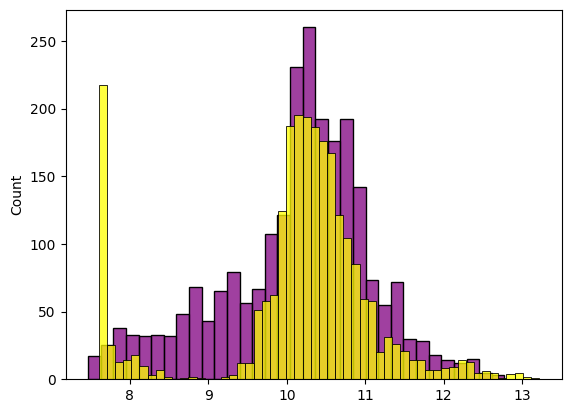

In [28]:
sns.histplot(y_pred, color='purple', label='predicted')
sns.histplot(y_val, color='yellow', label='actual')

***Categorical features***
---
---

In [29]:
for v in [2,3,4]:

    df_train[f'num_doors_{v}'] = (df_train.number_of_doors == v).astype(int)

In [30]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,1,0,0
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,0,0,1
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,0,0,1
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,0,1,0
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,1,0,0
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,1,0,0
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,0,0,1
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,0,0,1


In [31]:
def prepare_x(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2,3,4]:
        df[f'num_doors_{v}'] = (df.number_of_doors == v).astype(int)
        features.append(f'num_doors_{v}')
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [32]:
X_train = prepare_x(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)  

np.float64(0.515799564150169)

In [33]:
makes = df.make.value_counts().head().index.to_list()

In [34]:
def prepare_x(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2,3,4]:
        df[f'num_doors_{v}'] = (df.number_of_doors == v).astype(int)
        features.append(f'num_doors_{v}')
    
    for v in makes:
        df[f'makes_{v}'] = (df.make == v).astype(int)
        features.append(f'makes_{v}')
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [35]:
X_train = prepare_x(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)  

np.float64(0.5076038849556795)

In [36]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
num_doors_2            int64
num_doors_3            int64
num_doors_4            int64
dtype: object

In [37]:
categorical_variables = [  "make",                 
                "engine_fuel_type",      
                "transmission_type",     
                "driven_wheels",         
                "market_category",       
                "vehicle_size",          
                "vehicle_style"    
               ]         

In [38]:
categories = {}

for c in categorical_variables:
    categories[c] = df_train[c].value_counts().head().index.to_list()

In [39]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'hatchback',
  'luxury,performance'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [40]:
def prepare_x(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2,3,4]:
        df[f'num_doors_{v}'] = (df.number_of_doors == v).astype(int)
        features.append(f'num_doors_{v}')
        
    for c, values in categories.items():
        for v in values:
            df[f'{c}_{v}'] = (df[c] == v).astype(int)
            features.append(f'{c}_{v}')
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [41]:
X_train = prepare_x(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred) 

np.float64(18.233065519897817)

In [42]:
w0, w

(np.float64(1490771050477478.8),
 array([ 1.41288317e-01, -7.27397824e+00,  3.20239665e-01,  7.30302499e-01,
         8.73894740e-04,  6.49760160e-01,  5.94647112e+02,  5.98436224e+02,
         5.98183330e+02, -4.78644621e+00, -7.25755525e+00,  1.13778025e+01,
        -5.30795929e+00, -1.13820741e+00,  1.98591333e+01,  1.21198905e+01,
         1.11480113e+01,  3.88043944e+01, -4.08153418e+01, -7.52992678e+14,
        -7.52992678e+14, -7.52992678e+14, -7.52992678e+14, -7.52992678e+14,
        -7.37778373e+14, -7.37778373e+14, -7.37778373e+14, -7.37778373e+14,
         4.78940184e-01,  4.73836724e-01,  3.02822038e-01,  7.90042162e+00,
         6.93276588e-01, -8.59305965e-01, -2.28494498e-01, -3.38881589e+00,
        -4.85492239e-02,  5.44797374e-02,  1.78241160e-01,  3.41906701e-01,
        -1.64412078e-01]))

***Regularization***
---
---

In [44]:
def train_linear_regression_reg(X, y, r = 0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + 0.01 * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [45]:
X_train = prepare_x(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r = 0.01)

X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred) 

np.float64(0.456521990159498)

<Axes: ylabel='Count'>

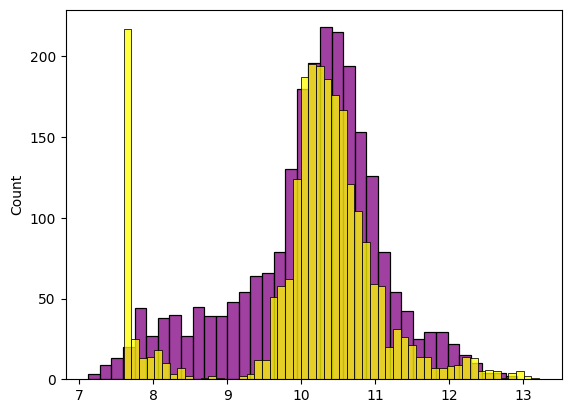

In [46]:
sns.histplot(y_pred, color='purple', label='predicted')
sns.histplot(y_val, color='yellow', label='actual')

***Tuning the model***
---
---

In [47]:
for r in [0.0, 0.0001, 0.001, 0.01, 0.1, 1, 10]:

    X_train = prepare_x(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r)

    X_val = prepare_x(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred) 
    
    print(r, w0, score)

0.0 6.276608807851224 0.456521990159498
0.0001 6.276608807851224 0.456521990159498
0.001 6.276608807851224 0.456521990159498
0.01 6.276608807851224 0.456521990159498
0.1 6.276608807851224 0.456521990159498
1 6.276608807851224 0.456521990159498
10 6.276608807851224 0.456521990159498


In [48]:
X_train = prepare_x(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r = 0.001)

X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred) 

np.float64(0.456521990159498)

***Using the model***
---
---

In [54]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop = True)

In [55]:
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,1.0,0.0,0.0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,0.0,0.0,1.0
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,0.0,0.0,1.0
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,0.0,1.0,0.0
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870,NaN,NaN,NaN
9528,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238,NaN,NaN,NaN
9529,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624,NaN,NaN,NaN
9530,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436,NaN,NaN,NaN


In [56]:
X_full_train = prepare_x(df_full_train)
X_full_train 

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]], shape=(9532, 41))

In [57]:
y_full_train = np.concat([y_train, y_val])
y_full_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 11.21756062,
        9.77542688, 10.1924563 ], shape=(9532,))

In [58]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r = 0.001)

In [59]:
X_test = prepare_x(df_test)
y_pred = w0 + X_test.dot(w)

rmse(y_test, y_pred) 

np.float64(0.4517787580648003)

In [61]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [62]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [64]:
X_small = prepare_x(df_small)

In [67]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]

In [68]:
y_pred

np.float64(10.462575851063221)

In [69]:
np.expm1(y_pred)

np.float64(34980.54273914123)

In [70]:
np.expm1(y_test[20])

np.float64(35000.00000000001)